In [1]:
# --- Load CUDA module (if on HPC) ---
!module load CUDA/12.6.0

# --- Persist environment variables for this Python process ---
import os

os.environ["CUDA_HOME"] = "/apps/common/software/CUDA/12.6.0"
os.environ["PATH"] = f"{os.environ['CUDA_HOME']}/bin:" + os.environ["PATH"]
os.environ["LD_LIBRARY_PATH"] = f"{os.environ['CUDA_HOME']}/lib64:" + os.environ.get("LD_LIBRARY_PATH", "")

# --- Verify ---
!which nvcc
!nvidia-smi
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

environment: /usr/share/lmod/lmod/libexec/lmod: No such file or directory
Illegal option --
Usage: /usr/bin/which [-a] args
Sun Nov 16 23:29:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-PCIE-16GB           On  |   00000000:3B:00.0 Off |                    0 |
| N/A   31C    P0             42W /  250W |     830MiB /  16384MiB |      0%      Default |
|               

2025-11-16 23:29:30.177031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-16 23:29:30.193882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-16 23:29:30.198992: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-16 23:29:30.211730: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-16 23:29:32.050389: W tensorflow/comp

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
!pip install tensorflow==2.17.0

Defaulting to user installation because normal site-packages is not writeable


Notebook directory: /home/rameyjm7/workspace/ML-wireless-signal-classification/docker
Project root: /home/rameyjm7/workspace/ML-wireless-signal-classification
Loading DeepRadar2022 from: /home/rameyjm7/workspace/ML-wireless-signal-classification/data/DeepRadar2022
Loading model from: /home/rameyjm7/workspace/ML-wireless-signal-classification/models/deepradar2022_cnn_bilstm_final.keras


2025-11-16 23:29:52.175563: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13958 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
/home/rameyjm7/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 38 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-11-16 23:29:56.770460: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8900
W0000 00:00:1763353797.075449 3128726 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1763353797.113536 3128726 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1763353797.133599 3128726 gpu_timer.cc:114] Skipping the delay kernel, measurement accu


✅ Model Test Accuracy (all SNRs): 84.33%


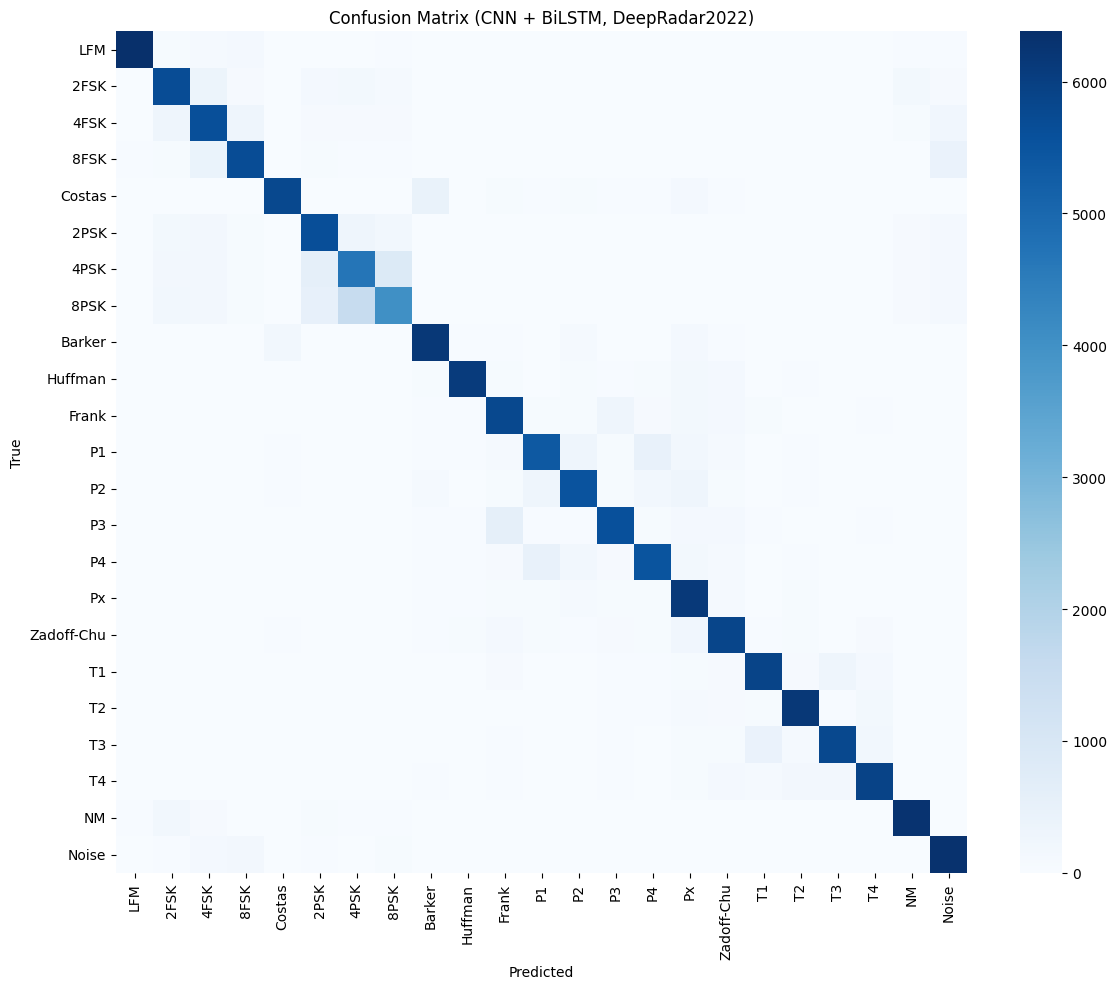


Classification Report (All SNRs):
              precision    recall  f1-score   support

         LFM       0.97      0.94      0.96      6800
        2FSK       0.82      0.84      0.83      6800
        4FSK       0.77      0.83      0.80      6800
        8FSK       0.86      0.84      0.85      6800
      Costas       0.93      0.85      0.89      6800
        2PSK       0.79      0.83      0.81      6800
        4PSK       0.68      0.69      0.68      6800
        8PSK       0.74      0.59      0.66      6800
      Barker       0.88      0.91      0.89      6800
     Huffman       0.94      0.90      0.92      6800
       Frank       0.80      0.85      0.83      6800
          P1       0.83      0.79      0.81      6800
          P2       0.84      0.81      0.83      6800
          P3       0.87      0.82      0.84      6800
          P4       0.82      0.81      0.81      6800
          Px       0.76      0.90      0.82      6800
  Zadoff-Chu       0.82      0.86      0.84   

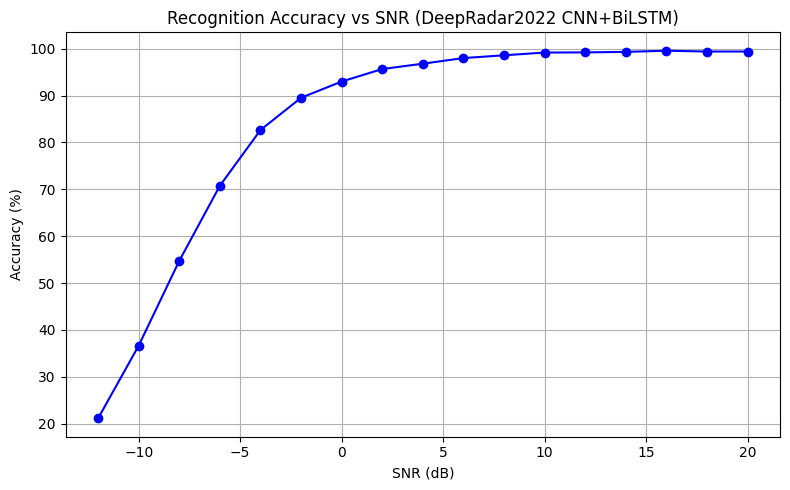

In [3]:
# https://www.kaggle.com/jacobramey
# https://github.com/rameyjm7

import os
import numpy as np
import h5py, scipy.io as sio
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model
from pathlib import Path

# ------------------------------
# Resolve notebook directory safely
# ------------------------------
notebook_dir = Path().resolve()
project_root = notebook_dir.parent

print(f"Notebook directory: {notebook_dir}")
print(f"Project root: {project_root}")

# ------------------------------
# Load DeepRadar2022 dataset
# ------------------------------
path = project_root / "data" / "DeepRadar2022"
print(f"Loading DeepRadar2022 from: {path}")

def load_h5(filepath, key):
    with h5py.File(filepath, "r") as f:
        return np.array(f[key], dtype="float32").T

def load_mat(filepath, key):
    d = sio.loadmat(filepath)
    return d[key]

X_test  = load_h5(path / "X_test.mat", "X_test")
Y_test  = load_mat(path / "Y_test.mat", "Y_test")
lbl_test = load_mat(path / "lbl_test.mat", "lbl_test")

# Extract modulation class and SNR
cls_test, snr_test = lbl_test[:,0].astype(int)-1, lbl_test[:,1]

# ------------------------------
# Normalize IQ per sample
# ------------------------------
def normalize_iq(X):
    Xn = np.empty_like(X)
    for i in range(X.shape[0]):
        scale = np.max(np.abs(X[i])) + 1e-12
        Xn[i] = X[i] / scale
    return Xn

X_test = normalize_iq(X_test)

# ------------------------------
# Append SNR as a third channel
# ------------------------------
def append_snr_feature(X, snr):
    X_out = []
    for i in range(X.shape[0]):
        snr_col = np.full((X.shape[1], 1), snr[i] / 20.0)
        X_out.append(np.concatenate([X[i], snr_col], axis=1))
    return np.array(X_out, dtype=np.float32)

X_test = append_snr_feature(X_test, snr_test)

# ------------------------------
# Load pre-trained model
# ------------------------------
model_path = project_root / "models" / "deepradar2022_cnn_bilstm_final.keras"
print(f"Loading model from: {model_path}")
model = load_model(model_path)

# ------------------------------
# Evaluate model
# ------------------------------
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"\n✅ Model Test Accuracy (all SNRs): {acc*100:.2f}%")

# ------------------------------
# Predictions and metrics
# ------------------------------
Y_pred = model.predict(X_test, verbose=0)
y_true = np.argmax(Y_test, axis=1)
y_pred = np.argmax(Y_pred, axis=1)

# ------------------------------
# Confusion Matrix
# ------------------------------
labels = [
    "LFM", "2FSK", "4FSK", "8FSK", "Costas", "2PSK", "4PSK", "8PSK",
    "Barker", "Huffman", "Frank", "P1", "P2", "P3", "P4", "Px",
    "Zadoff-Chu", "T1", "T2", "T3", "T4", "NM", "Noise"
]

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", cbar=True,
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CNN + BiLSTM, DeepRadar2022)")
plt.tight_layout()
plt.show()

print("\nClassification Report (All SNRs):")
print(classification_report(y_true, y_pred, target_names=labels))

# ------------------------------
# Accuracy vs SNR
# ------------------------------
unique_snrs = sorted(np.unique(snr_test))
acc_snr = []
for snr in unique_snrs:
    idx = np.where(snr_test == snr)[0]
    acc_snr.append(accuracy_score(y_true[idx], y_pred[idx]) * 100)

plt.figure(figsize=(8,5))
plt.plot(unique_snrs, acc_snr, 'b-o')
plt.xlabel("SNR (dB)")
plt.ylabel("Accuracy (%)")
plt.title("Recognition Accuracy vs SNR (DeepRadar2022 CNN+BiLSTM)")
plt.grid(True)
plt.tight_layout()
plt.show()


Resolved model path: /home/rameyjm7/workspace/ML-wireless-signal-classification/models/lstm_rnn_2024.keras
Model loaded successfully.
Loading dataset: /home/rameyjm7/workspace/ML-wireless-signal-classification/data/RML2016/RML2016.10a_dict.pkl


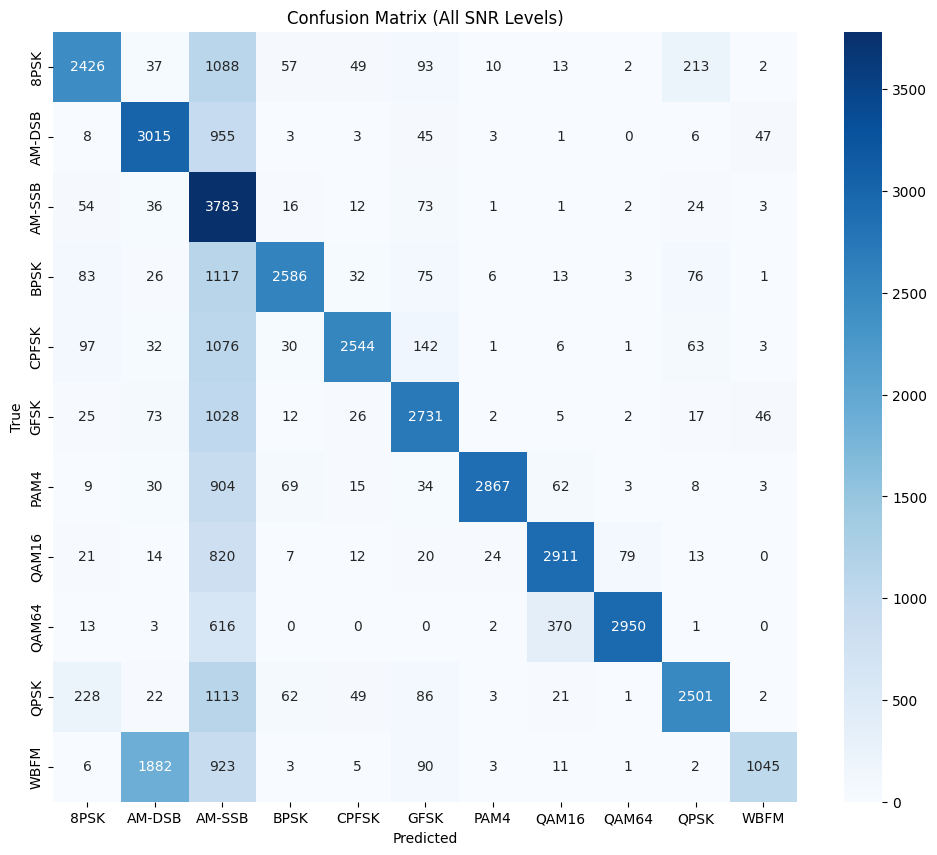


Classification Report (All SNR Levels):
              precision    recall  f1-score   support

        8PSK       0.82      0.61      0.70      3990
      AM-DSB       0.58      0.74      0.65      4086
      AM-SSB       0.28      0.94      0.43      4005
        BPSK       0.91      0.64      0.75      4018
       CPFSK       0.93      0.64      0.75      3995
        GFSK       0.81      0.69      0.74      3967
        PAM4       0.98      0.72      0.83      4004
       QAM16       0.85      0.74      0.79      3921
       QAM64       0.97      0.75      0.84      3955
        QPSK       0.86      0.61      0.71      4088
        WBFM       0.91      0.26      0.41      3971

    accuracy                           0.67     44000
   macro avg       0.81      0.67      0.69     44000
weighted avg       0.81      0.67      0.69     44000


Samples with SNR > 5 dB: 15332


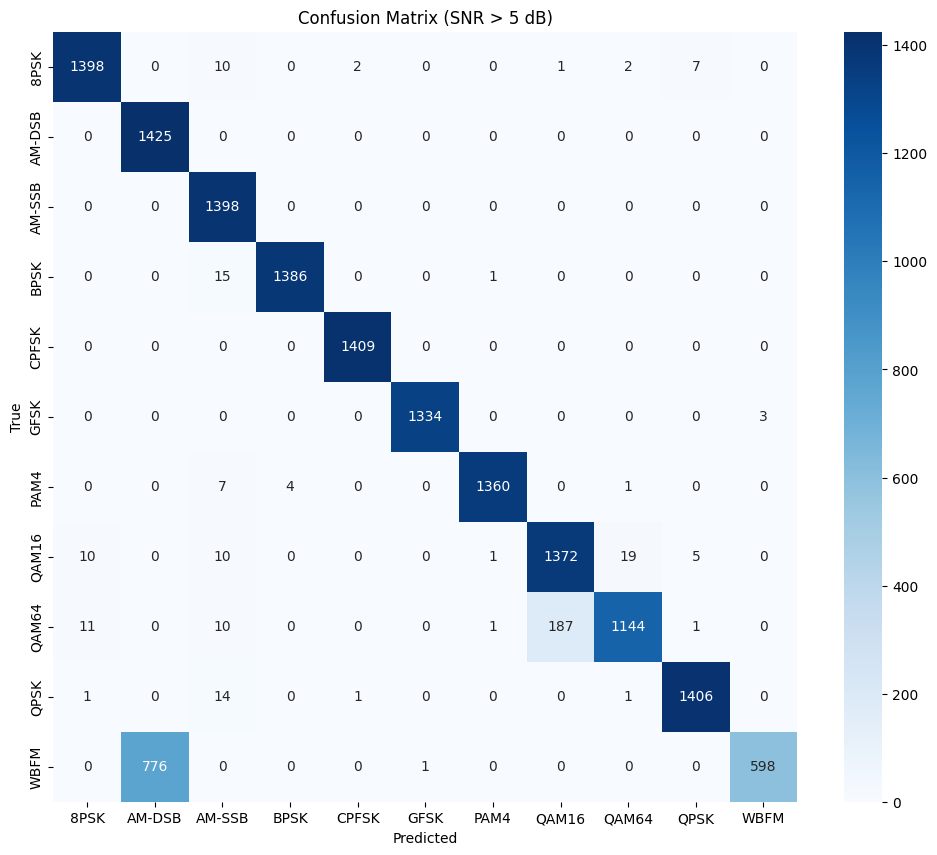


Classification Report (SNR > 5 dB):
              precision    recall  f1-score   support

        8PSK       0.98      0.98      0.98      1420
      AM-DSB       0.65      1.00      0.79      1425
      AM-SSB       0.95      1.00      0.98      1398
        BPSK       1.00      0.99      0.99      1402
       CPFSK       1.00      1.00      1.00      1409
        GFSK       1.00      1.00      1.00      1337
        PAM4       1.00      0.99      0.99      1372
       QAM16       0.88      0.97      0.92      1417
       QAM64       0.98      0.84      0.91      1354
        QPSK       0.99      0.99      0.99      1423
        WBFM       1.00      0.43      0.61      1375

    accuracy                           0.93     15332
   macro avg       0.95      0.93      0.92     15332
weighted avg       0.95      0.93      0.92     15332



In [7]:
# https://www.kaggle.com/jacobramey
# https://github.com/rameyjm7

import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import tensorflow as tf
import os

# --------------------------------------------------------------
# Resolve model path
# --------------------------------------------------------------
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
model_path = os.path.join(project_root, "models", "lstm_rnn_2024.keras")

print("Resolved model path:", model_path)
assert os.path.exists(model_path), f"Model file not found: {model_path}"

model = load_model(model_path)
print("Model loaded successfully.")

# --------------------------------------------------------------
# Load RML2016.10a Dataset
# --------------------------------------------------------------
pkl_path = os.path.join(project_root, "data", "RML2016", "RML2016.10a_dict.pkl")
print("Loading dataset:", pkl_path)

with open(pkl_path, "rb") as f:
    data = pickle.load(f, encoding="latin1")

# --------------------------------------------------------------
# Prepare Data (your exact provided format)
# --------------------------------------------------------------
def prepare_data(data):
    X, y, snrs = [], [], []

    for (mod_type, snr), signals in data.items():
        for signal in signals:
            # IQ: shape (128, 2)
            iq = np.vstack([signal[0], signal[1]]).T

            # SNR feature channel (raw SNR, consistent with your training format)
            snr_col = np.full((128, 1), snr, dtype=np.float32)

            combined = np.hstack([iq, snr_col])  # (128, 3)

            X.append(combined)
            y.append(mod_type)
            snrs.append(snr)   # keep real SNR for analysis

    X = np.array(X)
    y = np.array(y)
    snrs = np.array(snrs)

    # Encode labels
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Train/test split
    X_train, X_test, y_train, y_test, snr_train, snr_test = train_test_split(
        X, y_encoded, snrs, test_size=0.2, random_state=42
    )

    # LSTM requires this shape already (128, 3)
    return X_train, X_test, y_train, y_test, snr_train, snr_test, encoder

# Prepare
X_train, X_test, y_train, y_test, snr_train, snr_test, encoder = prepare_data(data)

# --------------------------------------------------------------
# Evaluate model on full test set
# --------------------------------------------------------------
y_pred = np.argmax(model.predict(X_test, verbose=False), axis=1)

# Confusion matrix (ALL SNR)
cm_all = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (All SNR Levels)")
plt.show()

print("\nClassification Report (All SNR Levels):")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# --------------------------------------------------------------
# Evaluate only SNR > 5 dB subset
# --------------------------------------------------------------
idx_high = np.where(snr_test > 5)[0]

X_high = X_test[idx_high]
y_high = y_test[idx_high]

print(f"\nSamples with SNR > 5 dB: {len(idx_high)}")

y_pred_high = np.argmax(model.predict(X_high, verbose=False), axis=1)

cm_high = confusion_matrix(y_high, y_pred_high)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_high, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (SNR > 5 dB)")
plt.show()

print("\nClassification Report (SNR > 5 dB):")
print(classification_report(y_high, y_pred_high, target_names=encoder.classes_))
